In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Librerias de los modelos supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Modelación reduciendo el número de ejemplos a 3807

In [2]:
df = pd.read_csv("./dataset/predictive_transform_2.csv")

In [3]:
data_0 = df[df["MOG_A"] == 0]
data_1 = df[df["MOG_A"] == 1]
data_0.shape, data_1.shape

((18418, 18), (2047, 18))

In [4]:
# tomamos una muestra de 3000

data_0 = data_0.sample(n = int(10e+3))
data_0.shape

(10000, 18)

In [5]:
df = data_1.append(data_0)
df["MOG_A"].value_counts()

C:\Users\Victor\AppData\Local\Temp\ipykernel_6064\2169110200.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_1.append(data_0)


0.0    10000
1.0     2047
Name: MOG_A, dtype: int64

In [6]:
df

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
2575,2019-07-13 11:51:00,42.0,0.0,35.0,38.0,0.0,0.0,1.0,233.2,233.7,233.0,1.1,0.9,1.1,405.5,405.3,405.2,0.1
2576,2019-07-13 11:51:00,42.0,0.0,35.0,38.0,0.0,0.0,1.0,233.2,233.7,233.0,1.1,0.9,1.1,405.5,405.3,405.2,0.1
2579,2019-07-13 12:30:00,41.0,0.0,34.0,39.0,0.0,0.0,1.0,232.5,232.8,232.4,143.8,173.1,157.7,403.9,405.1,404.5,25.5
2580,2019-07-13 12:45:00,39.0,0.0,33.0,39.0,0.0,0.0,1.0,232.4,232.9,232.3,150.0,141.5,152.0,402.6,402.9,402.3,9.4
2581,2019-07-13 13:00:00,39.0,0.0,33.0,39.0,0.0,0.0,1.0,232.2,233.1,232.1,148.3,124.5,130.9,404.5,404.5,403.2,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,2019-09-11 08:30:00,32.0,0.0,30.0,43.0,0.0,0.0,0.0,238.4,238.3,238.9,44.6,65.0,62.6,414.0,414.6,413.7,18.9
16757,2020-02-14 20:30:00,25.0,1.0,22.0,100.0,0.0,0.0,0.0,248.1,246.9,245.5,92.4,85.9,147.8,428.3,425.5,429.2,58.9
11193,2019-11-02 10:45:00,29.0,0.0,31.0,78.0,0.0,0.0,0.0,237.9,238.7,237.6,93.9,45.6,88.2,413.2,411.1,413.1,45.0
7824,2019-09-16 14:45:00,37.0,0.0,33.0,42.0,0.0,0.0,0.0,226.5,227.3,228.5,166.9,133.8,129.2,392.5,396.2,394.5,34.9


## División del Dataset: train-test

In [8]:
X = df.drop(columns = ["DeviceTimeStamp", "MOG_A"] , axis=1)
y = df["MOG_A"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Normalización de los datos

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos Supervisados, Clasificación binaria

## Modelo 1: Regresión Logística

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Evaluación

In [11]:
y_pred_lr = log_reg.predict(X_test)

In [12]:
lr_train = round(log_reg.score(X_train, y_train)*100, 2)
lr_accuracy = round(accuracy_score(y_test, y_pred_lr)*100, 2)

print("Accuracy del entrenamiento :",lr_train, "%")
print("Accuracy del modelo :",lr_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 95.15 %
Accuracy del modelo : 94.4 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1999
         1.0       0.83      0.84      0.84       411

    accuracy                           0.94      2410
   macro avg       0.90      0.90      0.90      2410
weighted avg       0.94      0.94      0.94      2410

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


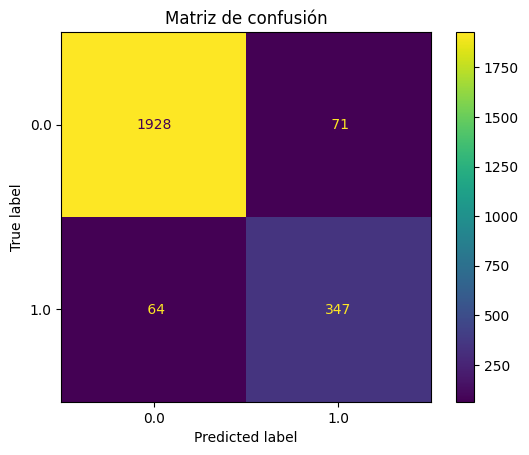

In [13]:
plot_confusion_matrix(log_reg, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 2: Árbol de decision

In [14]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### evaluación

In [15]:
y_pred_dt = tree.predict(X_test)

In [16]:
dt_train = round(tree.score(X_train, y_train)*100, 2)
dt_accuracy = round(accuracy_score(y_test, y_pred_dt)*100, 2)

print("Accuracy del entrenamiento :",dt_train, "%")
print("Accuracy del modelo :",dt_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 97.47 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1999
         1.0       0.92      0.93      0.93       411

    accuracy                           0.97      2410
   macro avg       0.95      0.96      0.96      2410
weighted avg       0.97      0.97      0.97      2410

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


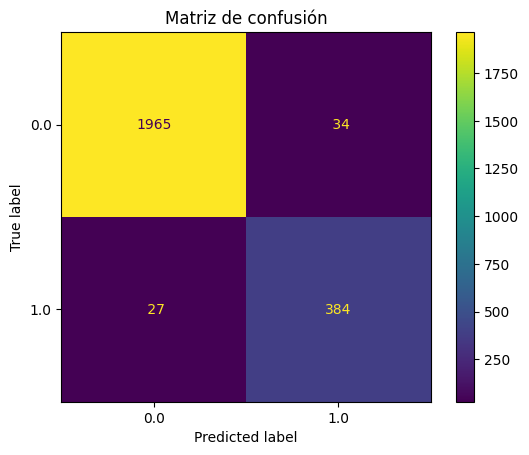

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 3: Bosques aleatorios

In [18]:
ran_for = RandomForestClassifier(n_estimators=150, criterion='gini', max_features='sqrt', max_depth=10)
ran_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

### Evaluación

In [19]:
y_pred_rf =ran_for.predict(X_test)

In [20]:
rf_train = round(ran_for.score(X_train, y_train)*100, 2)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf)*100, 2)

print("Accuracy del entrenamiento :",rf_train, "%")
print("Accuracy del modelo :",rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 99.14 %
Accuracy del modelo : 98.09 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1999
         1.0       0.92      0.97      0.95       411

    accuracy                           0.98      2410
   macro avg       0.96      0.98      0.97      2410
weighted avg       0.98      0.98      0.98      2410

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


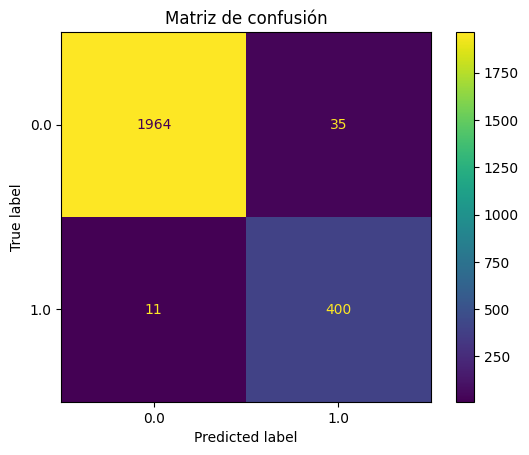

In [21]:
plot_confusion_matrix(ran_for, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 4: Máquina de Vectores de Soporte

In [22]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

### Evaluación

In [23]:
y_pred_svc = svc.predict(X_test)

In [24]:
svc_train = round(ran_for.score(X_train, y_train)*100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100, 2)

print("Accuracy del entrenamiento :",svc_train, "%")
print("Accuracy del modelo :",svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 99.14 %
Accuracy del modelo : 94.44 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1999
         1.0       0.81      0.88      0.84       411

    accuracy                           0.94      2410
   macro avg       0.89      0.92      0.90      2410
weighted avg       0.95      0.94      0.95      2410

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


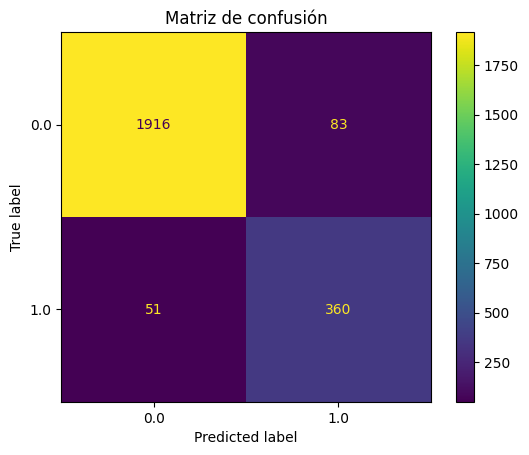

In [25]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 5: K-vecinos cercanos

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluación

In [27]:
y_pred_knn = knn.predict(X_test)

In [28]:
knn_train = round(knn.score(X_train, y_train)*100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100, 2)

print("Accuracy del entrenamiento :",knn_train, "%")
print("Accuracy del modelo :",knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 97.4 %
Accuracy del modelo : 93.9 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      1999
         1.0       0.81      0.84      0.82       411

    accuracy                           0.94      2410
   macro avg       0.89      0.90      0.89      2410
weighted avg       0.94      0.94      0.94      2410

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


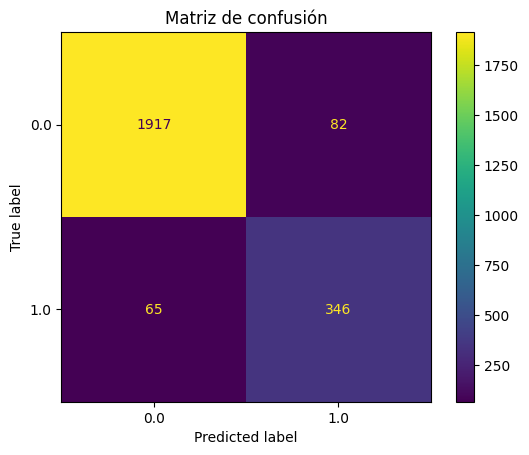

In [29]:
plot_confusion_matrix(knn, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

In [30]:
mod = pd.DataFrame({
    'Model': [
        'Regresión logística', 'Árboles de decisión', 'Bosques aleatorios', 'Máquinas de vectores de soporte', 'k vecinos cercanos'
    ],
    'Accuracy del entrenamiento': [
        lr_train, dt_train, rf_train, svc_train, knn_train
    ],
    'Accuracy de la evaluación': [
        lr_accuracy, dt_accuracy, rf_accuracy, svc_accuracy, knn_accuracy
    ]
})

In [31]:
mod

,Model,Accuracy del entrenamiento,Accuracy de la evaluación
0,Regresión logística,95.15,94.40
1,Árboles de decisión,100.00,97.47
2,Bosques aleatorios,99.14,98.09
3,Máquinas de vectores de soporte,99.14,94.44
4,k vecinos cercanos,97.40,93.90


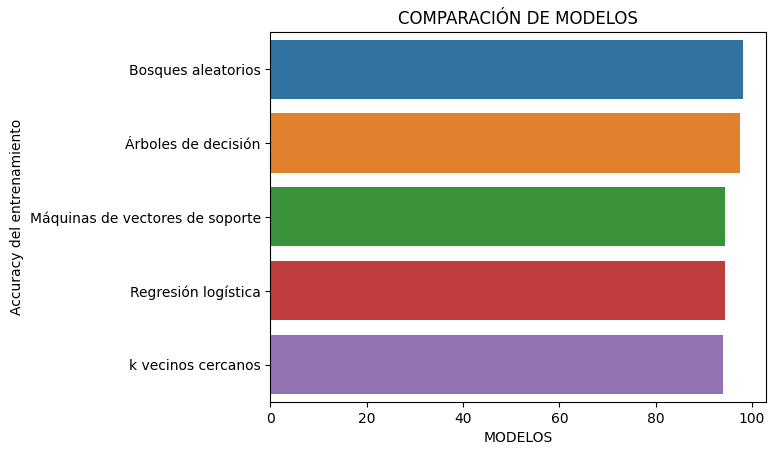

In [32]:
mod = mod.sort_values(by='Accuracy de la evaluación',ascending=False)[:8]

sns.barplot(y= 'Model', x= 'Accuracy de la evaluación', data= mod)
plt.title('COMPARACIÓN DE MODELOS')
plt.xlabel('MODELOS')
plt.ylabel('Accuracy del entrenamiento');